In [ ]:
import sys
sys.path.append('..')

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from src.autoencoders import Autoencoder, VariationalAutoEncoder
from utils.mnist_loader import data_download, data_loader
from utils.model_trainer import autoencoder_trainer, vae_trainer
from utils.visualization import visualization

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda:0" if USE_CUDA else "cpu")
EPOCHS = 100
SAMPLES = 5
print(DEVICE)
train_data, test_data = data_download()
train_loader, test_loader = data_loader(train_data, test_data, batch_size=256)

cuda:0
number of training data :  60000
number of test data :  10000


# Autoencoder

In [3]:
ae=Autoencoder(n_hidden=336, z_dim=128).to(DEVICE)
criteria = nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr=0.001)

In [4]:
train_loss, test_loss = autoencoder_trainer(model=ae, 
                                            criteria=criteria, optimizer=optimizer, 
                                            train_loader=train_loader, test_loader=test_loader, 
                                            device=DEVICE, epochs = EPOCHS)

  1%|          | 1/100 [01:11<1:58:24, 71.76s/it]

epochs: 1 - Train loss: 0.05692167207598686 - Test loss: 0.06921812146902084


  2%|▏         | 2/100 [02:02<1:36:53, 59.32s/it]

epochs: 2 - Train loss: 0.04686934873461723 - Test loss: 0.05052662640810013


  3%|▎         | 3/100 [02:58<1:33:48, 58.03s/it]

epochs: 3 - Train loss: 0.03166787698864937 - Test loss: 0.026341402903199196


  4%|▍         | 4/100 [03:46<1:26:24, 54.01s/it]

epochs: 4 - Train loss: 0.026871783658862114 - Test loss: 0.026222048327326775


  5%|▌         | 5/100 [04:33<1:21:31, 51.49s/it]

epochs: 5 - Train loss: 0.022289780899882317 - Test loss: 0.023341067135334015


  6%|▌         | 6/100 [05:21<1:18:47, 50.29s/it]

epochs: 6 - Train loss: 0.020244594663381577 - Test loss: 0.01885257102549076


  7%|▋         | 7/100 [06:05<1:14:46, 48.24s/it]

epochs: 7 - Train loss: 0.016019558534026146 - Test loss: 0.013821464963257313


  8%|▊         | 8/100 [06:42<1:08:34, 44.72s/it]

epochs: 8 - Train loss: 0.014357063919305801 - Test loss: 0.016972238197922707


  9%|▉         | 9/100 [07:24<1:06:25, 43.79s/it]

epochs: 9 - Train loss: 0.01447738241404295 - Test loss: 0.010582073591649532


 10%|█         | 10/100 [08:03<1:03:28, 42.32s/it]

epochs: 10 - Train loss: 0.012674110941588879 - Test loss: 0.012179370038211346


 11%|█         | 11/100 [08:56<1:07:27, 45.48s/it]

epochs: 11 - Train loss: 0.011767672374844551 - Test loss: 0.009716476313769817


 12%|█▏        | 12/100 [09:39<1:05:33, 44.70s/it]

epochs: 12 - Train loss: 0.010552050545811653 - Test loss: 0.012292672879993916


 13%|█▎        | 13/100 [10:31<1:08:00, 46.90s/it]

epochs: 13 - Train loss: 0.010759622789919376 - Test loss: 0.00838910136371851


 14%|█▍        | 14/100 [11:23<1:09:21, 48.38s/it]

epochs: 14 - Train loss: 0.010882385075092316 - Test loss: 0.010398639366030693


 15%|█▌        | 15/100 [12:12<1:09:12, 48.85s/it]

epochs: 15 - Train loss: 0.00919578317552805 - Test loss: 0.009261674247682095


 16%|█▌        | 16/100 [12:59<1:07:22, 48.12s/it]

epochs: 16 - Train loss: 0.009178899228572845 - Test loss: 0.008618634194135666


 17%|█▋        | 17/100 [13:47<1:06:42, 48.22s/it]

epochs: 17 - Train loss: 0.009064820595085621 - Test loss: 0.00868864543735981


 18%|█▊        | 18/100 [14:38<1:07:02, 49.06s/it]

epochs: 18 - Train loss: 0.0086137093603611 - Test loss: 0.008065783418715


 19%|█▉        | 19/100 [15:30<1:07:28, 49.98s/it]

epochs: 19 - Train loss: 0.009300037287175655 - Test loss: 0.006804963573813438


 20%|██        | 20/100 [16:15<1:04:25, 48.31s/it]

epochs: 20 - Train loss: 0.008688893169164658 - Test loss: 0.010581860318779945


 21%|██        | 21/100 [17:03<1:03:27, 48.19s/it]

epochs: 21 - Train loss: 0.00768634956330061 - Test loss: 0.0067733703181147575


 22%|██▏       | 22/100 [17:50<1:02:08, 47.80s/it]

epochs: 22 - Train loss: 0.007566662039607763 - Test loss: 0.007619213312864304


 23%|██▎       | 23/100 [18:46<1:04:43, 50.43s/it]

epochs: 23 - Train loss: 0.007941557094454765 - Test loss: 0.006349925417453051


 24%|██▍       | 24/100 [19:41<1:05:42, 51.87s/it]

epochs: 24 - Train loss: 0.007659104187041521 - Test loss: 0.00927924644201994


 25%|██▌       | 25/100 [20:32<1:04:28, 51.58s/it]

epochs: 25 - Train loss: 0.007254360243678093 - Test loss: 0.007969583384692669


 26%|██▌       | 26/100 [21:20<1:02:03, 50.32s/it]

epochs: 26 - Train loss: 0.006876301486045122 - Test loss: 0.007157415151596069


 27%|██▋       | 27/100 [22:07<1:00:16, 49.54s/it]

epochs: 27 - Train loss: 0.007063304539769888 - Test loss: 0.0071218241937458515


 28%|██▊       | 28/100 [22:57<59:36, 49.67s/it]  

epochs: 28 - Train loss: 0.007330222055315971 - Test loss: 0.005959727801382542


 29%|██▉       | 29/100 [23:55<1:01:35, 52.05s/it]

epochs: 29 - Train loss: 0.0074651530012488365 - Test loss: 0.008396930061280727


 30%|███       | 30/100 [24:43<59:11, 50.73s/it]  

epochs: 30 - Train loss: 0.007132952567189932 - Test loss: 0.007307159714400768


 31%|███       | 31/100 [25:24<55:05, 47.90s/it]

epochs: 31 - Train loss: 0.0058911084197461605 - Test loss: 0.007251117844134569


 32%|███▏      | 32/100 [26:07<52:44, 46.54s/it]

epochs: 32 - Train loss: 0.006903503090143204 - Test loss: 0.006098465528339148


 33%|███▎      | 33/100 [27:08<56:42, 50.78s/it]

epochs: 33 - Train loss: 0.007046095095574856 - Test loss: 0.009067030623555183


 34%|███▍      | 34/100 [27:56<54:46, 49.80s/it]

epochs: 34 - Train loss: 0.006301351822912693 - Test loss: 0.007157623767852783


 35%|███▌      | 35/100 [28:46<54:09, 50.00s/it]

epochs: 35 - Train loss: 0.006674348842352629 - Test loss: 0.007161603309214115


 36%|███▌      | 36/100 [29:46<56:30, 52.98s/it]

epochs: 36 - Train loss: 0.00680013420060277 - Test loss: 0.005674498155713081


 37%|███▋      | 37/100 [30:45<57:32, 54.80s/it]

epochs: 37 - Train loss: 0.006405537948012352 - Test loss: 0.007427772972732782


 38%|███▊      | 38/100 [31:35<55:14, 53.46s/it]

epochs: 38 - Train loss: 0.006443439982831478 - Test loss: 0.00745113380253315


 39%|███▉      | 39/100 [32:28<54:05, 53.21s/it]

epochs: 39 - Train loss: 0.006544324103742838 - Test loss: 0.006561215966939926


 40%|████      | 40/100 [33:22<53:20, 53.34s/it]

epochs: 40 - Train loss: 0.005959618370980024 - Test loss: 0.007360824383795261


 41%|████      | 41/100 [34:11<51:08, 52.01s/it]

epochs: 41 - Train loss: 0.005536599084734917 - Test loss: 0.004970363806933165


 42%|████▏     | 42/100 [35:05<50:57, 52.71s/it]

epochs: 42 - Train loss: 0.0059628174640238285 - Test loss: 0.00546983303502202


 43%|████▎     | 43/100 [35:56<49:39, 52.27s/it]

epochs: 43 - Train loss: 0.005798182915896177 - Test loss: 0.006143847014755011


 44%|████▍     | 44/100 [36:45<47:58, 51.40s/it]

epochs: 44 - Train loss: 0.0055720447562634945 - Test loss: 0.006038542836904526


 45%|████▌     | 45/100 [37:48<50:15, 54.83s/it]

epochs: 45 - Train loss: 0.005498150363564491 - Test loss: 0.006525314413011074


 46%|████▌     | 46/100 [38:43<49:15, 54.73s/it]

epochs: 46 - Train loss: 0.006461342331022024 - Test loss: 0.004547655116766691


 47%|████▋     | 47/100 [39:43<49:52, 56.47s/it]

epochs: 47 - Train loss: 0.0058115096762776375 - Test loss: 0.005552457179874182


 48%|████▊     | 48/100 [40:50<51:29, 59.41s/it]

epochs: 48 - Train loss: 0.0061960481107234955 - Test loss: 0.006588974501937628


 49%|████▉     | 49/100 [41:50<50:44, 59.69s/it]

epochs: 49 - Train loss: 0.005226909648627043 - Test loss: 0.006044224835932255


 50%|█████     | 50/100 [42:50<49:51, 59.82s/it]

epochs: 50 - Train loss: 0.0059644063003361225 - Test loss: 0.007350508123636246


 51%|█████     | 51/100 [43:41<46:44, 57.24s/it]

epochs: 51 - Train loss: 0.005241082981228828 - Test loss: 0.00536910118535161


 52%|█████▏    | 52/100 [44:40<46:08, 57.68s/it]

epochs: 52 - Train loss: 0.005510002840310335 - Test loss: 0.007466234732419252


 53%|█████▎    | 53/100 [45:37<44:57, 57.40s/it]

epochs: 53 - Train loss: 0.005655788350850344 - Test loss: 0.005883464124053717


 54%|█████▍    | 54/100 [46:40<45:24, 59.24s/it]

epochs: 54 - Train loss: 0.004894721787422895 - Test loss: 0.0059348163194954395


 55%|█████▌    | 55/100 [47:37<43:55, 58.56s/it]

epochs: 55 - Train loss: 0.005447136238217354 - Test loss: 0.005044471938163042


 56%|█████▌    | 56/100 [48:25<40:37, 55.40s/it]

epochs: 56 - Train loss: 0.005606899969279766 - Test loss: 0.005334091372787952


 57%|█████▋    | 57/100 [49:29<41:25, 57.79s/it]

epochs: 57 - Train loss: 0.005467270500957966 - Test loss: 0.005725052673369646


 58%|█████▊    | 58/100 [50:26<40:23, 57.70s/it]

epochs: 58 - Train loss: 0.005412588361650705 - Test loss: 0.004930418450385332


 59%|█████▉    | 59/100 [51:11<36:49, 53.89s/it]

epochs: 59 - Train loss: 0.005164591129869223 - Test loss: 0.005248230881989002


 60%|██████    | 60/100 [52:03<35:26, 53.17s/it]

epochs: 60 - Train loss: 0.004956853110343218 - Test loss: 0.00455486448481679


 61%|██████    | 61/100 [52:40<31:27, 48.40s/it]

epochs: 61 - Train loss: 0.005356090143322945 - Test loss: 0.006002461072057486


 62%|██████▏   | 62/100 [53:13<27:47, 43.89s/it]

epochs: 62 - Train loss: 0.00516576087102294 - Test loss: 0.006152115762233734


 63%|██████▎   | 63/100 [53:52<26:06, 42.35s/it]

epochs: 63 - Train loss: 0.0052773538045585155 - Test loss: 0.004472819156944752


 64%|██████▍   | 64/100 [54:31<24:45, 41.26s/it]

epochs: 64 - Train loss: 0.004658076912164688 - Test loss: 0.006922864820808172


 65%|██████▌   | 65/100 [55:22<25:53, 44.40s/it]

epochs: 65 - Train loss: 0.005809192545711994 - Test loss: 0.005267759785056114


 66%|██████▌   | 66/100 [56:15<26:31, 46.81s/it]

epochs: 66 - Train loss: 0.004896984901279211 - Test loss: 0.005494976416230202


 67%|██████▋   | 67/100 [57:13<27:32, 50.06s/it]

epochs: 67 - Train loss: 0.0051226080395281315 - Test loss: 0.005664926487952471


 68%|██████▊   | 68/100 [58:04<26:55, 50.49s/it]

epochs: 68 - Train loss: 0.005095047876238823 - Test loss: 0.003996600396931171


 69%|██████▉   | 69/100 [58:59<26:43, 51.73s/it]

epochs: 69 - Train loss: 0.00488806888461113 - Test loss: 0.0059297955594956875


 70%|███████   | 70/100 [59:52<26:03, 52.12s/it]

epochs: 70 - Train loss: 0.0047615994699299335 - Test loss: 0.005081129260361195


 71%|███████   | 71/100 [1:00:48<25:47, 53.38s/it]

epochs: 71 - Train loss: 0.004868037067353725 - Test loss: 0.004759997129440308


 72%|███████▏  | 72/100 [1:01:47<25:44, 55.17s/it]

epochs: 72 - Train loss: 0.0048694615252316 - Test loss: 0.004461018834263086


 73%|███████▎  | 73/100 [1:02:46<25:18, 56.23s/it]

epochs: 73 - Train loss: 0.004718241281807423 - Test loss: 0.005263520870357752


 74%|███████▍  | 74/100 [1:03:41<24:15, 56.00s/it]

epochs: 74 - Train loss: 0.004959895275533199 - Test loss: 0.005491161253303289


 75%|███████▌  | 75/100 [1:04:41<23:45, 57.02s/it]

epochs: 75 - Train loss: 0.004644148983061314 - Test loss: 0.0046333130449056625


 76%|███████▌  | 76/100 [1:05:42<23:15, 58.16s/it]

epochs: 76 - Train loss: 0.004752771463245153 - Test loss: 0.005353097803890705


 77%|███████▋  | 77/100 [1:06:39<22:15, 58.05s/it]

epochs: 77 - Train loss: 0.004948449786752462 - Test loss: 0.004330052994191647


 78%|███████▊  | 78/100 [1:07:43<21:50, 59.59s/it]

epochs: 78 - Train loss: 0.004794499836862087 - Test loss: 0.005282636731863022


 79%|███████▉  | 79/100 [1:08:42<20:51, 59.61s/it]

epochs: 79 - Train loss: 0.004711498972028494 - Test loss: 0.004781640134751797


 80%|████████  | 80/100 [1:09:46<20:15, 60.77s/it]

epochs: 80 - Train loss: 0.005238084588199854 - Test loss: 0.005762685090303421


 81%|████████  | 81/100 [1:10:44<18:59, 59.98s/it]

epochs: 81 - Train loss: 0.004693023860454559 - Test loss: 0.005124230869114399


 82%|████████▏ | 82/100 [1:11:39<17:35, 58.61s/it]

epochs: 82 - Train loss: 0.004820430185645819 - Test loss: 0.00673382543027401


 83%|████████▎ | 83/100 [1:12:30<15:55, 56.19s/it]

epochs: 83 - Train loss: 0.005195464938879013 - Test loss: 0.005706982221454382


 84%|████████▍ | 84/100 [1:13:22<14:37, 54.83s/it]

epochs: 84 - Train loss: 0.0046786037273705006 - Test loss: 0.005710992030799389


 85%|████████▌ | 85/100 [1:14:09<13:09, 52.62s/it]

epochs: 85 - Train loss: 0.004564298782497644 - Test loss: 0.004396035801619291


 86%|████████▌ | 86/100 [1:14:59<12:04, 51.74s/it]

epochs: 86 - Train loss: 0.004616072401404381 - Test loss: 0.005608694162219763


 87%|████████▋ | 87/100 [1:15:56<11:34, 53.46s/it]

epochs: 87 - Train loss: 0.005209981929510832 - Test loss: 0.004861634690314531


 88%|████████▊ | 88/100 [1:16:54<10:58, 54.90s/it]

epochs: 88 - Train loss: 0.004631699062883854 - Test loss: 0.004857053980231285


 89%|████████▉ | 89/100 [1:17:48<10:00, 54.55s/it]

epochs: 89 - Train loss: 0.004598389379680157 - Test loss: 0.006409880705177784


 90%|█████████ | 90/100 [1:18:36<08:44, 52.44s/it]

epochs: 90 - Train loss: 0.004302866291254759 - Test loss: 0.004611372482031584


 91%|█████████ | 91/100 [1:19:20<07:29, 49.91s/it]

epochs: 91 - Train loss: 0.004258675500750542 - Test loss: 0.003712835256010294


 92%|█████████▏| 92/100 [1:20:14<06:50, 51.37s/it]

epochs: 92 - Train loss: 0.00461388286203146 - Test loss: 0.005655042827129364


 93%|█████████▎| 93/100 [1:21:07<06:02, 51.82s/it]

epochs: 93 - Train loss: 0.004809712991118431 - Test loss: 0.005226437002420425


 94%|█████████▍| 94/100 [1:22:01<05:13, 52.24s/it]

epochs: 94 - Train loss: 0.004255054984241724 - Test loss: 0.006388092413544655


 95%|█████████▌| 95/100 [1:23:02<04:35, 55.00s/it]

epochs: 95 - Train loss: 0.0042325882241129875 - Test loss: 0.006318353582173586


 96%|█████████▌| 96/100 [1:24:01<03:45, 56.33s/it]

epochs: 96 - Train loss: 0.0040662833489477634 - Test loss: 0.005138743668794632


 97%|█████████▋| 97/100 [1:24:56<02:47, 55.68s/it]

epochs: 97 - Train loss: 0.004452627617865801 - Test loss: 0.005713291000574827


 98%|█████████▊| 98/100 [1:25:53<01:52, 56.32s/it]

epochs: 98 - Train loss: 0.004630095791071653 - Test loss: 0.004975388292223215


 99%|█████████▉| 99/100 [1:26:48<00:55, 55.92s/it]

epochs: 99 - Train loss: 0.0044341012835502625 - Test loss: 0.005828551948070526


100%|██████████| 100/100 [1:27:45<00:00, 52.65s/it]

epochs: 100 - Train loss: 0.0042770360596477985 - Test loss: 0.006003136280924082


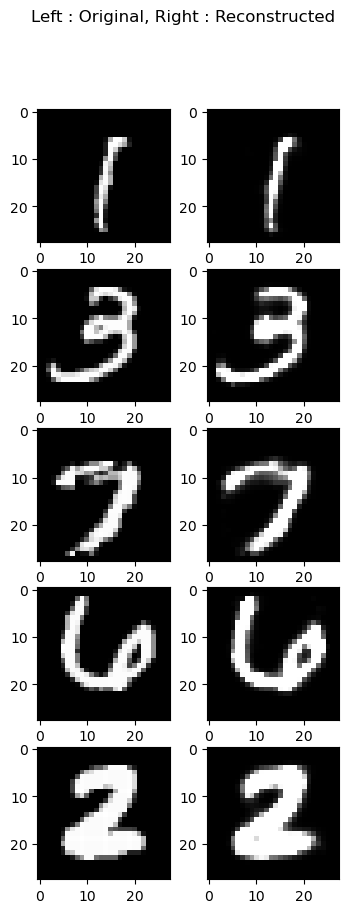

In [5]:
visualization(loader=test_loader, model=ae, device=DEVICE, num_of_samples=SAMPLES)

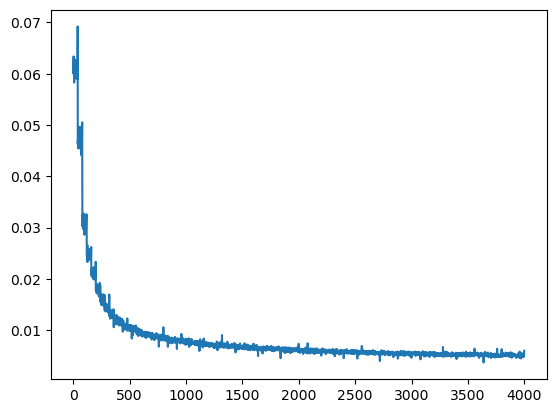

In [6]:
plt.plot(np.array(test_loss))
plt.show()

# Variational Autoencoder

In [7]:
def vae_loss(reconstruction, x, mu, log_var):
    reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, x, reduction='sum') # bernoulli distribution assumption
    kl_loss = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss, kl_loss

In [8]:
vae = VariationalAutoEncoder(n_hidden=336, z_dim=128).to(DEVICE)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)
criteria = vae_loss

In [9]:
train_loss, test_loss = vae_trainer(model=vae, beta=1,
                                    criteria=criteria, optimizer=optimizer, 
                                    train_loader=train_loader, test_loader=test_loader, 
                                    device=DEVICE, epochs = EPOCHS)

  1%|          | 1/100 [01:01<1:41:28, 61.50s/it]

epochs: 1 - Train loss: 199.46327209472656 - Test loss: 202.02012634277344
Test Error Ratio || reconstruction error: 198.697021484375 , KLD: 3.3230979442596436


  2%|▏         | 2/100 [02:00<1:38:18, 60.19s/it]

epochs: 2 - Train loss: 188.59030151367188 - Test loss: 186.01104736328125
Test Error Ratio || reconstruction error: 179.13681030273438 , KLD: 6.874231815338135


  3%|▎         | 3/100 [02:57<1:35:02, 58.78s/it]

epochs: 3 - Train loss: 175.29144287109375 - Test loss: 178.83218383789062
Test Error Ratio || reconstruction error: 171.20559692382812 , KLD: 7.626589775085449


  4%|▍         | 4/100 [03:51<1:30:46, 56.73s/it]

epochs: 4 - Train loss: 154.73915100097656 - Test loss: 159.7714385986328
Test Error Ratio || reconstruction error: 150.04833984375 , KLD: 9.723098754882812


  5%|▌         | 5/100 [04:38<1:24:29, 53.36s/it]

epochs: 5 - Train loss: 147.77328491210938 - Test loss: 136.7281036376953
Test Error Ratio || reconstruction error: 126.49446105957031 , KLD: 10.233646392822266


  6%|▌         | 6/100 [05:29<1:21:58, 52.32s/it]

epochs: 6 - Train loss: 146.65475463867188 - Test loss: 131.72267150878906
Test Error Ratio || reconstruction error: 118.96815490722656 , KLD: 12.754510879516602


  7%|▋         | 7/100 [06:12<1:16:35, 49.41s/it]

epochs: 7 - Train loss: 134.9603729248047 - Test loss: 131.26609802246094
Test Error Ratio || reconstruction error: 117.84785461425781 , KLD: 13.418246269226074


  8%|▊         | 8/100 [06:59<1:14:29, 48.58s/it]

epochs: 8 - Train loss: 132.74525451660156 - Test loss: 129.1764373779297
Test Error Ratio || reconstruction error: 115.0631332397461 , KLD: 14.113308906555176


  9%|▉         | 9/100 [07:45<1:12:22, 47.72s/it]

epochs: 9 - Train loss: 126.33529663085938 - Test loss: 120.02989196777344
Test Error Ratio || reconstruction error: 105.07730865478516 , KLD: 14.952587127685547


 10%|█         | 10/100 [08:30<1:10:16, 46.85s/it]

epochs: 10 - Train loss: 128.6156005859375 - Test loss: 134.85374450683594
Test Error Ratio || reconstruction error: 119.33502960205078 , KLD: 15.518719673156738


 11%|█         | 11/100 [09:15<1:08:43, 46.34s/it]

epochs: 11 - Train loss: 123.13977813720703 - Test loss: 142.62718200683594
Test Error Ratio || reconstruction error: 126.72998809814453 , KLD: 15.897187232971191


 12%|█▏        | 12/100 [10:02<1:08:29, 46.70s/it]

epochs: 12 - Train loss: 116.46690368652344 - Test loss: 133.63136291503906
Test Error Ratio || reconstruction error: 116.98922729492188 , KLD: 16.642141342163086


 13%|█▎        | 13/100 [10:45<1:06:07, 45.61s/it]

epochs: 13 - Train loss: 129.01634216308594 - Test loss: 115.14044189453125
Test Error Ratio || reconstruction error: 99.95035552978516 , KLD: 15.190082550048828


 14%|█▍        | 14/100 [11:31<1:05:15, 45.53s/it]

epochs: 14 - Train loss: 120.48454284667969 - Test loss: 124.31474304199219
Test Error Ratio || reconstruction error: 108.79484558105469 , KLD: 15.519901275634766


 15%|█▌        | 15/100 [12:21<1:06:28, 46.92s/it]

epochs: 15 - Train loss: 120.8871078491211 - Test loss: 106.7573013305664
Test Error Ratio || reconstruction error: 91.11050415039062 , KLD: 15.646795272827148


 16%|█▌        | 16/100 [13:05<1:04:21, 45.97s/it]

epochs: 16 - Train loss: 112.92521667480469 - Test loss: 117.78692626953125
Test Error Ratio || reconstruction error: 100.64344787597656 , KLD: 17.143474578857422


 17%|█▋        | 17/100 [13:47<1:02:12, 44.97s/it]

epochs: 17 - Train loss: 112.28904724121094 - Test loss: 114.31224060058594
Test Error Ratio || reconstruction error: 97.64089965820312 , KLD: 16.671342849731445


 18%|█▊        | 18/100 [14:41<1:05:02, 47.59s/it]

epochs: 18 - Train loss: 120.63336181640625 - Test loss: 108.4740982055664
Test Error Ratio || reconstruction error: 92.2569351196289 , KLD: 16.2171630859375


 19%|█▉        | 19/100 [15:35<1:06:51, 49.53s/it]

epochs: 19 - Train loss: 114.33305358886719 - Test loss: 127.75291442871094
Test Error Ratio || reconstruction error: 111.13328552246094 , KLD: 16.619626998901367


 20%|██        | 20/100 [16:25<1:06:15, 49.70s/it]

epochs: 20 - Train loss: 117.80329895019531 - Test loss: 130.5232696533203
Test Error Ratio || reconstruction error: 113.3790283203125 , KLD: 17.144235610961914


 21%|██        | 21/100 [17:18<1:06:37, 50.61s/it]

epochs: 21 - Train loss: 117.86430358886719 - Test loss: 126.4599380493164
Test Error Ratio || reconstruction error: 107.4131851196289 , KLD: 19.046754837036133


 22%|██▏       | 22/100 [18:14<1:07:57, 52.28s/it]

epochs: 22 - Train loss: 114.61610412597656 - Test loss: 112.8679428100586
Test Error Ratio || reconstruction error: 96.31680297851562 , KLD: 16.551137924194336


 23%|██▎       | 23/100 [19:10<1:08:22, 53.28s/it]

epochs: 23 - Train loss: 110.73379516601562 - Test loss: 111.572021484375
Test Error Ratio || reconstruction error: 94.4249496459961 , KLD: 17.14706802368164


 24%|██▍       | 24/100 [20:10<1:10:01, 55.29s/it]

epochs: 24 - Train loss: 115.53743743896484 - Test loss: 116.61235046386719
Test Error Ratio || reconstruction error: 99.18913269042969 , KLD: 17.423221588134766


 25%|██▌       | 25/100 [21:06<1:09:23, 55.51s/it]

epochs: 25 - Train loss: 117.80211639404297 - Test loss: 121.32246398925781
Test Error Ratio || reconstruction error: 102.39810180664062 , KLD: 18.924365997314453


 26%|██▌       | 26/100 [22:04<1:09:29, 56.34s/it]

epochs: 26 - Train loss: 116.64732360839844 - Test loss: 111.87615203857422
Test Error Ratio || reconstruction error: 94.371826171875 , KLD: 17.50432777404785


 27%|██▋       | 27/100 [23:02<1:09:16, 56.94s/it]

epochs: 27 - Train loss: 114.42951965332031 - Test loss: 103.1676254272461
Test Error Ratio || reconstruction error: 86.7089614868164 , KLD: 16.458663940429688


 28%|██▊       | 28/100 [23:58<1:07:56, 56.62s/it]

epochs: 28 - Train loss: 107.42573547363281 - Test loss: 98.80404663085938
Test Error Ratio || reconstruction error: 81.71810150146484 , KLD: 17.085947036743164


 29%|██▉       | 29/100 [24:56<1:07:21, 56.93s/it]

epochs: 29 - Train loss: 119.10466766357422 - Test loss: 115.91658020019531
Test Error Ratio || reconstruction error: 98.29491424560547 , KLD: 17.621665954589844


 30%|███       | 30/100 [25:59<1:08:32, 58.75s/it]

epochs: 30 - Train loss: 110.69408416748047 - Test loss: 111.54867553710938
Test Error Ratio || reconstruction error: 92.99989318847656 , KLD: 18.548784255981445


 31%|███       | 31/100 [26:59<1:08:05, 59.20s/it]

epochs: 31 - Train loss: 111.9442138671875 - Test loss: 101.9738998413086
Test Error Ratio || reconstruction error: 83.45954895019531 , KLD: 18.514352798461914


 32%|███▏      | 32/100 [27:56<1:06:24, 58.59s/it]

epochs: 32 - Train loss: 113.42137908935547 - Test loss: 118.64273071289062
Test Error Ratio || reconstruction error: 99.41484832763672 , KLD: 19.227882385253906


 33%|███▎      | 33/100 [28:55<1:05:34, 58.72s/it]

epochs: 33 - Train loss: 107.38188171386719 - Test loss: 112.71772766113281
Test Error Ratio || reconstruction error: 93.855224609375 , KLD: 18.862506866455078


 34%|███▍      | 34/100 [29:41<1:00:25, 54.93s/it]

epochs: 34 - Train loss: 109.69744110107422 - Test loss: 101.58244323730469
Test Error Ratio || reconstruction error: 83.27507019042969 , KLD: 18.307373046875


 35%|███▌      | 35/100 [30:33<58:19, 53.84s/it]  

epochs: 35 - Train loss: 113.45449829101562 - Test loss: 105.18175506591797
Test Error Ratio || reconstruction error: 86.21924591064453 , KLD: 18.962507247924805


 36%|███▌      | 36/100 [31:36<1:00:28, 56.70s/it]

epochs: 36 - Train loss: 111.70405578613281 - Test loss: 126.36554718017578
Test Error Ratio || reconstruction error: 107.4259033203125 , KLD: 18.93964385986328


 37%|███▋      | 37/100 [32:38<1:01:03, 58.14s/it]

epochs: 37 - Train loss: 111.65635681152344 - Test loss: 98.974365234375
Test Error Ratio || reconstruction error: 81.9794921875 , KLD: 16.994874954223633


 38%|███▊      | 38/100 [33:30<58:19, 56.45s/it]  

epochs: 38 - Train loss: 112.69773864746094 - Test loss: 106.76004028320312
Test Error Ratio || reconstruction error: 88.00276184082031 , KLD: 18.757278442382812


 39%|███▉      | 39/100 [34:29<58:06, 57.16s/it]

epochs: 39 - Train loss: 111.78827667236328 - Test loss: 102.755859375
Test Error Ratio || reconstruction error: 84.58123016357422 , KLD: 18.17462730407715


 40%|████      | 40/100 [35:20<55:27, 55.46s/it]

epochs: 40 - Train loss: 112.11065673828125 - Test loss: 102.82848358154297
Test Error Ratio || reconstruction error: 84.20703125 , KLD: 18.62145233154297


 41%|████      | 41/100 [36:18<55:11, 56.14s/it]

epochs: 41 - Train loss: 112.43321228027344 - Test loss: 109.72540283203125
Test Error Ratio || reconstruction error: 91.85848999023438 , KLD: 17.86691665649414


 42%|████▏     | 42/100 [37:18<55:16, 57.18s/it]

epochs: 42 - Train loss: 110.85848236083984 - Test loss: 128.71066284179688
Test Error Ratio || reconstruction error: 108.9249496459961 , KLD: 19.78571319580078


 43%|████▎     | 43/100 [38:14<53:57, 56.80s/it]

epochs: 43 - Train loss: 108.94547271728516 - Test loss: 109.88037109375
Test Error Ratio || reconstruction error: 90.4382095336914 , KLD: 19.44216537475586


 44%|████▍     | 44/100 [39:09<52:45, 56.52s/it]

epochs: 44 - Train loss: 107.6623764038086 - Test loss: 98.88999938964844
Test Error Ratio || reconstruction error: 80.48827362060547 , KLD: 18.40172576904297


 45%|████▌     | 45/100 [40:10<52:49, 57.63s/it]

epochs: 45 - Train loss: 109.07766723632812 - Test loss: 113.12983703613281
Test Error Ratio || reconstruction error: 92.78721618652344 , KLD: 20.342622756958008


 46%|████▌     | 46/100 [41:12<53:05, 58.99s/it]

epochs: 46 - Train loss: 107.7308120727539 - Test loss: 106.34919738769531
Test Error Ratio || reconstruction error: 87.57085418701172 , KLD: 18.778339385986328


 47%|████▋     | 47/100 [42:17<53:47, 60.90s/it]

epochs: 47 - Train loss: 109.52558135986328 - Test loss: 108.3641357421875
Test Error Ratio || reconstruction error: 88.5479507446289 , KLD: 19.816184997558594


 48%|████▊     | 48/100 [43:13<51:21, 59.26s/it]

epochs: 48 - Train loss: 115.4434585571289 - Test loss: 103.54166412353516
Test Error Ratio || reconstruction error: 84.67525482177734 , KLD: 18.866409301757812


 49%|████▉     | 49/100 [44:04<48:28, 57.02s/it]

epochs: 49 - Train loss: 106.72257995605469 - Test loss: 98.91403198242188
Test Error Ratio || reconstruction error: 80.62264251708984 , KLD: 18.29138946533203


 50%|█████     | 50/100 [44:53<45:24, 54.50s/it]

epochs: 50 - Train loss: 109.66232299804688 - Test loss: 113.63070678710938
Test Error Ratio || reconstruction error: 94.48429107666016 , KLD: 19.146419525146484


 51%|█████     | 51/100 [45:51<45:19, 55.50s/it]

epochs: 51 - Train loss: 106.21391296386719 - Test loss: 111.57743835449219
Test Error Ratio || reconstruction error: 91.42033386230469 , KLD: 20.157106399536133


 52%|█████▏    | 52/100 [46:49<45:01, 56.27s/it]

epochs: 52 - Train loss: 112.15179443359375 - Test loss: 112.90284729003906
Test Error Ratio || reconstruction error: 93.21044158935547 , KLD: 19.692401885986328


 53%|█████▎    | 53/100 [47:49<44:57, 57.40s/it]

epochs: 53 - Train loss: 113.82368469238281 - Test loss: 106.72248077392578
Test Error Ratio || reconstruction error: 87.92697143554688 , KLD: 18.795509338378906


 54%|█████▍    | 54/100 [48:38<42:06, 54.93s/it]

epochs: 54 - Train loss: 108.56208801269531 - Test loss: 108.3551025390625
Test Error Ratio || reconstruction error: 88.82624816894531 , KLD: 19.528858184814453


 55%|█████▌    | 55/100 [49:33<41:11, 54.93s/it]

epochs: 55 - Train loss: 104.0694351196289 - Test loss: 112.66471099853516
Test Error Ratio || reconstruction error: 93.53179931640625 , KLD: 19.132911682128906


 56%|█████▌    | 56/100 [50:32<41:10, 56.14s/it]

epochs: 56 - Train loss: 109.72806549072266 - Test loss: 110.34056854248047
Test Error Ratio || reconstruction error: 90.82554626464844 , KLD: 19.51502227783203


 57%|█████▋    | 57/100 [51:30<40:34, 56.61s/it]

epochs: 57 - Train loss: 105.59451293945312 - Test loss: 87.091796875
Test Error Ratio || reconstruction error: 70.1273193359375 , KLD: 16.9644775390625


 58%|█████▊    | 58/100 [52:22<38:39, 55.23s/it]

epochs: 58 - Train loss: 109.54269409179688 - Test loss: 105.88839721679688
Test Error Ratio || reconstruction error: 86.15925598144531 , KLD: 19.729137420654297


 59%|█████▉    | 59/100 [53:11<36:36, 53.56s/it]

epochs: 59 - Train loss: 108.79766845703125 - Test loss: 109.18070983886719
Test Error Ratio || reconstruction error: 90.02496337890625 , KLD: 19.155742645263672


 60%|██████    | 60/100 [54:02<35:04, 52.61s/it]

epochs: 60 - Train loss: 109.0033950805664 - Test loss: 112.58946228027344
Test Error Ratio || reconstruction error: 92.25547790527344 , KLD: 20.333988189697266


 61%|██████    | 61/100 [54:54<34:12, 52.62s/it]

epochs: 61 - Train loss: 106.71012115478516 - Test loss: 105.71036529541016
Test Error Ratio || reconstruction error: 87.2464599609375 , KLD: 18.463905334472656


 62%|██████▏   | 62/100 [55:54<34:41, 54.77s/it]

epochs: 62 - Train loss: 101.35017395019531 - Test loss: 99.65943145751953
Test Error Ratio || reconstruction error: 81.36821746826172 , KLD: 18.291213989257812


 63%|██████▎   | 63/100 [56:57<35:13, 57.13s/it]

epochs: 63 - Train loss: 103.23503875732422 - Test loss: 103.35791778564453
Test Error Ratio || reconstruction error: 83.99639129638672 , KLD: 19.361526489257812


 64%|██████▍   | 64/100 [57:54<34:16, 57.14s/it]

epochs: 64 - Train loss: 107.14087677001953 - Test loss: 113.84233093261719
Test Error Ratio || reconstruction error: 93.99534606933594 , KLD: 19.84698486328125


 65%|██████▌   | 65/100 [58:43<31:53, 54.67s/it]

epochs: 65 - Train loss: 108.16939544677734 - Test loss: 113.49652862548828
Test Error Ratio || reconstruction error: 93.09139251708984 , KLD: 20.40513801574707


 66%|██████▌   | 66/100 [59:30<29:40, 52.36s/it]

epochs: 66 - Train loss: 106.58706665039062 - Test loss: 96.64307403564453
Test Error Ratio || reconstruction error: 77.83956909179688 , KLD: 18.803504943847656


 67%|██████▋   | 67/100 [1:00:18<28:02, 50.98s/it]

epochs: 67 - Train loss: 105.13619995117188 - Test loss: 104.84718322753906
Test Error Ratio || reconstruction error: 85.21443939208984 , KLD: 19.632747650146484


 68%|██████▊   | 68/100 [1:01:02<26:05, 48.92s/it]

epochs: 68 - Train loss: 103.31173706054688 - Test loss: 95.58766174316406
Test Error Ratio || reconstruction error: 76.65151977539062 , KLD: 18.936140060424805


 69%|██████▉   | 69/100 [1:01:47<24:43, 47.86s/it]

epochs: 69 - Train loss: 110.34344482421875 - Test loss: 112.30122375488281
Test Error Ratio || reconstruction error: 91.5909652709961 , KLD: 20.710262298583984


 70%|███████   | 70/100 [1:02:31<23:18, 46.61s/it]

epochs: 70 - Train loss: 106.9100570678711 - Test loss: 102.03164672851562
Test Error Ratio || reconstruction error: 83.3927993774414 , KLD: 18.63884735107422


 71%|███████   | 71/100 [1:03:27<23:51, 49.35s/it]

epochs: 71 - Train loss: 106.7353744506836 - Test loss: 109.19970703125
Test Error Ratio || reconstruction error: 90.34663391113281 , KLD: 18.853071212768555


 72%|███████▏  | 72/100 [1:04:23<23:58, 51.37s/it]

epochs: 72 - Train loss: 105.868408203125 - Test loss: 104.16150665283203
Test Error Ratio || reconstruction error: 83.78912353515625 , KLD: 20.372385025024414


 73%|███████▎  | 73/100 [1:05:18<23:41, 52.64s/it]

epochs: 73 - Train loss: 105.4935531616211 - Test loss: 100.54429626464844
Test Error Ratio || reconstruction error: 81.3601303100586 , KLD: 19.184162139892578


 74%|███████▍  | 74/100 [1:06:16<23:27, 54.12s/it]

epochs: 74 - Train loss: 101.63426208496094 - Test loss: 105.45588684082031
Test Error Ratio || reconstruction error: 85.59600830078125 , KLD: 19.85987663269043


 75%|███████▌  | 75/100 [1:07:04<21:44, 52.19s/it]

epochs: 75 - Train loss: 107.5076675415039 - Test loss: 110.38167572021484
Test Error Ratio || reconstruction error: 90.03559875488281 , KLD: 20.34607696533203


 76%|███████▌  | 76/100 [1:08:04<21:52, 54.68s/it]

epochs: 76 - Train loss: 104.9272232055664 - Test loss: 101.87059020996094
Test Error Ratio || reconstruction error: 81.63885498046875 , KLD: 20.231731414794922


 77%|███████▋  | 77/100 [1:08:54<20:26, 53.33s/it]

epochs: 77 - Train loss: 108.8903579711914 - Test loss: 108.97103881835938
Test Error Ratio || reconstruction error: 89.1834716796875 , KLD: 19.787569046020508


 78%|███████▊  | 78/100 [1:09:47<19:26, 53.04s/it]

epochs: 78 - Train loss: 105.65859985351562 - Test loss: 103.30375671386719
Test Error Ratio || reconstruction error: 83.76345825195312 , KLD: 19.540298461914062


 79%|███████▉  | 79/100 [1:10:45<19:06, 54.58s/it]

epochs: 79 - Train loss: 107.3190689086914 - Test loss: 99.2433090209961
Test Error Ratio || reconstruction error: 79.64393615722656 , KLD: 19.59937286376953


 80%|████████  | 80/100 [1:11:42<18:28, 55.43s/it]

epochs: 80 - Train loss: 106.12468719482422 - Test loss: 101.64917755126953
Test Error Ratio || reconstruction error: 82.06856536865234 , KLD: 19.580612182617188


 81%|████████  | 81/100 [1:12:42<17:57, 56.72s/it]

epochs: 81 - Train loss: 105.94563293457031 - Test loss: 96.88935852050781
Test Error Ratio || reconstruction error: 77.80999755859375 , KLD: 19.079357147216797


 82%|████████▏ | 82/100 [1:13:38<16:59, 56.64s/it]

epochs: 82 - Train loss: 103.87596130371094 - Test loss: 98.71127319335938
Test Error Ratio || reconstruction error: 79.67921447753906 , KLD: 19.032054901123047


 83%|████████▎ | 83/100 [1:14:31<15:42, 55.42s/it]

epochs: 83 - Train loss: 104.50447082519531 - Test loss: 106.78984832763672
Test Error Ratio || reconstruction error: 85.7461929321289 , KLD: 21.043655395507812


 84%|████████▍ | 84/100 [1:15:31<15:11, 56.96s/it]

epochs: 84 - Train loss: 102.5818862915039 - Test loss: 102.53776550292969
Test Error Ratio || reconstruction error: 83.23049926757812 , KLD: 19.307262420654297


 85%|████████▌ | 85/100 [1:16:32<14:28, 57.91s/it]

epochs: 85 - Train loss: 98.23577117919922 - Test loss: 114.82308197021484
Test Error Ratio || reconstruction error: 94.2437744140625 , KLD: 20.579307556152344


 86%|████████▌ | 86/100 [1:17:22<12:59, 55.70s/it]

epochs: 86 - Train loss: 102.0112533569336 - Test loss: 107.01573181152344
Test Error Ratio || reconstruction error: 87.05915832519531 , KLD: 19.956575393676758


 87%|████████▋ | 87/100 [1:18:22<12:20, 56.97s/it]

epochs: 87 - Train loss: 103.70758056640625 - Test loss: 111.51188659667969
Test Error Ratio || reconstruction error: 91.2978515625 , KLD: 20.214031219482422


 88%|████████▊ | 88/100 [1:19:11<10:56, 54.70s/it]

epochs: 88 - Train loss: 102.93418884277344 - Test loss: 109.01236724853516
Test Error Ratio || reconstruction error: 89.11045837402344 , KLD: 19.90190887451172


 89%|████████▉ | 89/100 [1:19:57<09:32, 52.07s/it]

epochs: 89 - Train loss: 102.15022277832031 - Test loss: 116.94194793701172
Test Error Ratio || reconstruction error: 96.08794403076172 , KLD: 20.854001998901367


 90%|█████████ | 90/100 [1:20:46<08:30, 51.07s/it]

epochs: 90 - Train loss: 103.82819366455078 - Test loss: 105.58714294433594
Test Error Ratio || reconstruction error: 86.7706069946289 , KLD: 18.816537857055664


 91%|█████████ | 91/100 [1:21:36<07:37, 50.80s/it]

epochs: 91 - Train loss: 108.5283203125 - Test loss: 92.93696594238281
Test Error Ratio || reconstruction error: 74.41368103027344 , KLD: 18.52328872680664


 92%|█████████▏| 92/100 [1:22:37<07:09, 53.66s/it]

epochs: 92 - Train loss: 105.5829086303711 - Test loss: 96.55372619628906
Test Error Ratio || reconstruction error: 77.32097625732422 , KLD: 19.23275375366211


 93%|█████████▎| 93/100 [1:23:30<06:14, 53.44s/it]

epochs: 93 - Train loss: 104.80986785888672 - Test loss: 107.29776000976562
Test Error Ratio || reconstruction error: 87.3752670288086 , KLD: 19.922496795654297


 94%|█████████▍| 94/100 [1:24:28<05:29, 54.96s/it]

epochs: 94 - Train loss: 105.9664306640625 - Test loss: 102.45152282714844
Test Error Ratio || reconstruction error: 82.29135131835938 , KLD: 20.16016960144043


 95%|█████████▌| 95/100 [1:25:26<04:39, 55.83s/it]

epochs: 95 - Train loss: 101.16383361816406 - Test loss: 106.64198303222656
Test Error Ratio || reconstruction error: 86.9642562866211 , KLD: 19.677730560302734


 96%|█████████▌| 96/100 [1:26:23<03:44, 56.24s/it]

epochs: 96 - Train loss: 104.70877838134766 - Test loss: 101.8659439086914
Test Error Ratio || reconstruction error: 82.19635009765625 , KLD: 19.669591903686523


 97%|█████████▋| 97/100 [1:27:21<02:50, 56.82s/it]

epochs: 97 - Train loss: 104.01567077636719 - Test loss: 100.19955444335938
Test Error Ratio || reconstruction error: 80.08029174804688 , KLD: 20.1192626953125


 98%|█████████▊| 98/100 [1:28:17<01:53, 56.60s/it]

epochs: 98 - Train loss: 103.94684600830078 - Test loss: 107.27334594726562
Test Error Ratio || reconstruction error: 85.82223510742188 , KLD: 21.451107025146484


 99%|█████████▉| 99/100 [1:29:15<00:56, 56.92s/it]

epochs: 99 - Train loss: 109.04469299316406 - Test loss: 106.61607360839844
Test Error Ratio || reconstruction error: 86.18600463867188 , KLD: 20.43006706237793


100%|██████████| 100/100 [1:30:16<00:00, 54.17s/it]

epochs: 100 - Train loss: 102.44647979736328 - Test loss: 100.24421691894531
Test Error Ratio || reconstruction error: 80.89485168457031 , KLD: 19.349367141723633


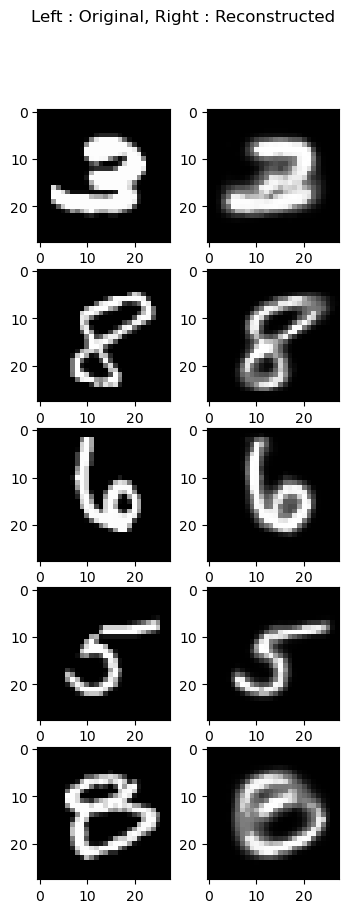

In [10]:
visualization(loader=test_loader, model=vae, device=DEVICE, num_of_samples=SAMPLES)

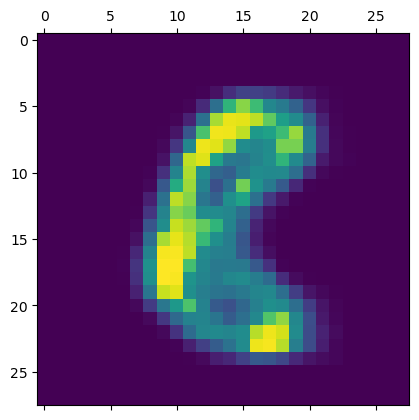

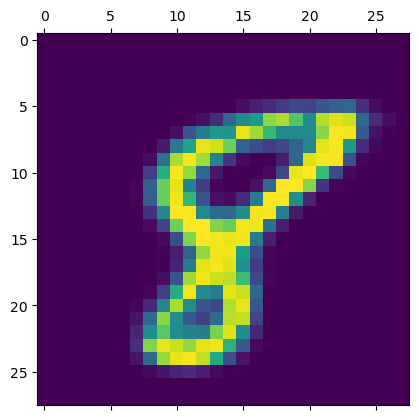

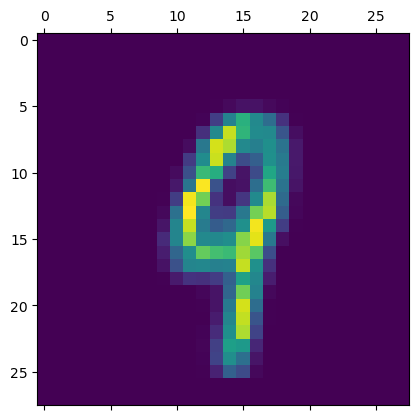

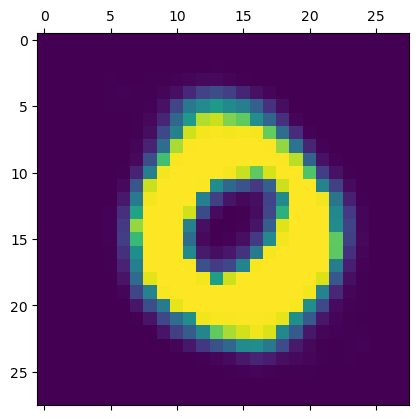

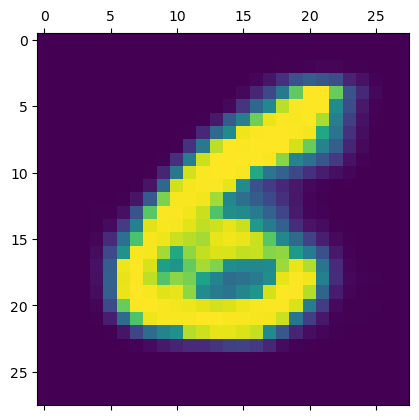

In [11]:
vae.cpu()
generated_samples = vae.generate(SAMPLES)

for sample in generated_samples:
    plt.matshow(sample.reshape(28,28))
    plt.show()

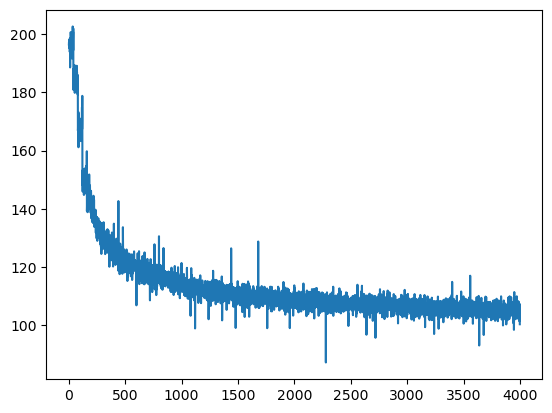

In [12]:
plt.plot(np.array(test_loss))
plt.show()

# Beta-Variational Autoencoder

In [13]:
b_vae = VariationalAutoEncoder(n_hidden=336, z_dim=128).to(DEVICE)
optimizer = torch.optim.Adam(b_vae.parameters(), lr=0.001)
criteria = vae_loss

In [14]:
train_loss, test_loss = vae_trainer(model=b_vae, beta=4,
                                    criteria=criteria, optimizer=optimizer, 
                                    train_loader=train_loader, test_loader=test_loader, 
                                    device=DEVICE, epochs = EPOCHS)

  1%|          | 1/100 [00:51<1:25:42, 51.95s/it]

epochs: 1 - Train loss: 201.4105987548828 - Test loss: 228.50677490234375
Test Error Ratio || reconstruction error: 224.94778442382812 , KLD: 0.8897477388381958


  2%|▏         | 2/100 [01:48<1:29:06, 54.55s/it]

epochs: 2 - Train loss: 191.3656005859375 - Test loss: 177.45655822753906
Test Error Ratio || reconstruction error: 174.7128448486328 , KLD: 0.685929536819458


  3%|▎         | 3/100 [02:47<1:31:39, 56.70s/it]

epochs: 3 - Train loss: 201.49288940429688 - Test loss: 198.19491577148438
Test Error Ratio || reconstruction error: 193.64405822753906 , KLD: 1.1377160549163818


  4%|▍         | 4/100 [03:37<1:26:09, 53.85s/it]

epochs: 4 - Train loss: 184.84881591796875 - Test loss: 201.4251251220703
Test Error Ratio || reconstruction error: 194.20159912109375 , KLD: 1.8058831691741943


  5%|▌         | 5/100 [04:36<1:28:38, 55.99s/it]

epochs: 5 - Train loss: 194.38348388671875 - Test loss: 186.47705078125
Test Error Ratio || reconstruction error: 174.07044982910156 , KLD: 3.101652145385742


  6%|▌         | 6/100 [05:31<1:27:10, 55.64s/it]

epochs: 6 - Train loss: 182.47532653808594 - Test loss: 182.28195190429688
Test Error Ratio || reconstruction error: 167.83010864257812 , KLD: 3.612961530685425


  7%|▋         | 7/100 [06:25<1:25:00, 54.85s/it]

epochs: 7 - Train loss: 177.7499542236328 - Test loss: 180.600341796875
Test Error Ratio || reconstruction error: 165.20315551757812 , KLD: 3.849297046661377


  8%|▊         | 8/100 [07:22<1:25:15, 55.60s/it]

epochs: 8 - Train loss: 167.4036407470703 - Test loss: 152.25604248046875
Test Error Ratio || reconstruction error: 132.32827758789062 , KLD: 4.981939315795898


  9%|▉         | 9/100 [08:15<1:23:21, 54.96s/it]

epochs: 9 - Train loss: 169.29002380371094 - Test loss: 175.34445190429688
Test Error Ratio || reconstruction error: 158.35842895507812 , KLD: 4.246506214141846


 10%|█         | 10/100 [09:01<1:18:15, 52.18s/it]

epochs: 10 - Train loss: 170.4116973876953 - Test loss: 172.48997497558594
Test Error Ratio || reconstruction error: 150.57276916503906 , KLD: 5.479301452636719


 11%|█         | 11/100 [10:01<1:20:37, 54.36s/it]

epochs: 11 - Train loss: 166.45205688476562 - Test loss: 157.57183837890625
Test Error Ratio || reconstruction error: 135.82972717285156 , KLD: 5.4355268478393555


 12%|█▏        | 12/100 [10:58<1:20:58, 55.21s/it]

epochs: 12 - Train loss: 169.4073944091797 - Test loss: 155.25057983398438
Test Error Ratio || reconstruction error: 133.89456176757812 , KLD: 5.339005947113037


 13%|█▎        | 13/100 [11:40<1:14:22, 51.29s/it]

epochs: 13 - Train loss: 157.75318908691406 - Test loss: 165.36715698242188
Test Error Ratio || reconstruction error: 143.3268585205078 , KLD: 5.510074138641357


 14%|█▍        | 14/100 [12:27<1:11:41, 50.02s/it]

epochs: 14 - Train loss: 165.039306640625 - Test loss: 193.210693359375
Test Error Ratio || reconstruction error: 169.27102661132812 , KLD: 5.984916687011719


 15%|█▌        | 15/100 [13:16<1:10:33, 49.81s/it]

epochs: 15 - Train loss: 164.3470458984375 - Test loss: 151.77264404296875
Test Error Ratio || reconstruction error: 127.64036560058594 , KLD: 6.033069610595703


 16%|█▌        | 16/100 [14:02<1:07:50, 48.46s/it]

epochs: 16 - Train loss: 160.39283752441406 - Test loss: 164.6586151123047
Test Error Ratio || reconstruction error: 138.52157592773438 , KLD: 6.5342583656311035


 17%|█▋        | 17/100 [14:50<1:07:04, 48.48s/it]

epochs: 17 - Train loss: 153.37098693847656 - Test loss: 173.72702026367188
Test Error Ratio || reconstruction error: 149.56906127929688 , KLD: 6.039489269256592


 18%|█▊        | 18/100 [15:45<1:08:58, 50.47s/it]

epochs: 18 - Train loss: 157.34637451171875 - Test loss: 147.74710083007812
Test Error Ratio || reconstruction error: 124.25506591796875 , KLD: 5.873008728027344


 19%|█▉        | 19/100 [16:42<1:10:47, 52.44s/it]

epochs: 19 - Train loss: 148.6392822265625 - Test loss: 147.44007873535156
Test Error Ratio || reconstruction error: 121.30543518066406 , KLD: 6.533659934997559


 20%|██        | 20/100 [17:41<1:12:16, 54.21s/it]

epochs: 20 - Train loss: 158.52658081054688 - Test loss: 176.42117309570312
Test Error Ratio || reconstruction error: 150.04312133789062 , KLD: 6.594512462615967


 21%|██        | 21/100 [18:41<1:13:39, 55.94s/it]

epochs: 21 - Train loss: 162.84799194335938 - Test loss: 161.41189575195312
Test Error Ratio || reconstruction error: 131.94729614257812 , KLD: 7.366150856018066


 22%|██▏       | 22/100 [19:38<1:13:17, 56.37s/it]

epochs: 22 - Train loss: 161.2120361328125 - Test loss: 135.7867431640625
Test Error Ratio || reconstruction error: 110.44931030273438 , KLD: 6.334358215332031


 23%|██▎       | 23/100 [20:36<1:12:47, 56.72s/it]

epochs: 23 - Train loss: 159.90924072265625 - Test loss: 147.18409729003906
Test Error Ratio || reconstruction error: 119.72984313964844 , KLD: 6.863564968109131


 24%|██▍       | 24/100 [21:36<1:13:17, 57.87s/it]

epochs: 24 - Train loss: 166.93951416015625 - Test loss: 146.58489990234375
Test Error Ratio || reconstruction error: 118.09892272949219 , KLD: 7.121493339538574


 25%|██▌       | 25/100 [22:28<1:10:04, 56.06s/it]

epochs: 25 - Train loss: 153.6990509033203 - Test loss: 154.13583374023438
Test Error Ratio || reconstruction error: 123.873046875 , KLD: 7.565698146820068


 26%|██▌       | 26/100 [23:20<1:07:45, 54.95s/it]

epochs: 26 - Train loss: 156.81997680664062 - Test loss: 165.76333618164062
Test Error Ratio || reconstruction error: 134.55960083007812 , KLD: 7.800934314727783


 27%|██▋       | 27/100 [24:19<1:08:16, 56.12s/it]

epochs: 27 - Train loss: 153.6616668701172 - Test loss: 162.97802734375
Test Error Ratio || reconstruction error: 131.947265625 , KLD: 7.7576904296875


 28%|██▊       | 28/100 [25:17<1:07:51, 56.55s/it]

epochs: 28 - Train loss: 154.52439880371094 - Test loss: 162.0979461669922
Test Error Ratio || reconstruction error: 134.31494140625 , KLD: 6.945751190185547


 29%|██▉       | 29/100 [26:08<1:05:00, 54.94s/it]

epochs: 29 - Train loss: 155.642822265625 - Test loss: 146.2100830078125
Test Error Ratio || reconstruction error: 118.11888122558594 , KLD: 7.022798538208008


 30%|███       | 30/100 [27:03<1:03:59, 54.86s/it]

epochs: 30 - Train loss: 149.54092407226562 - Test loss: 154.33001708984375
Test Error Ratio || reconstruction error: 126.98060607910156 , KLD: 6.837350845336914


 31%|███       | 31/100 [28:03<1:05:02, 56.56s/it]

epochs: 31 - Train loss: 149.7047576904297 - Test loss: 146.67152404785156
Test Error Ratio || reconstruction error: 118.48648071289062 , KLD: 7.046260356903076


 32%|███▏      | 32/100 [29:03<1:05:11, 57.53s/it]

epochs: 32 - Train loss: 157.35386657714844 - Test loss: 171.6420135498047
Test Error Ratio || reconstruction error: 140.5260772705078 , KLD: 7.778983116149902


 33%|███▎      | 33/100 [30:02<1:04:42, 57.95s/it]

epochs: 33 - Train loss: 157.80686950683594 - Test loss: 157.87118530273438
Test Error Ratio || reconstruction error: 128.93515014648438 , KLD: 7.2340087890625


 34%|███▍      | 34/100 [30:54<1:01:50, 56.22s/it]

epochs: 34 - Train loss: 157.06439208984375 - Test loss: 151.4047088623047
Test Error Ratio || reconstruction error: 123.41155242919922 , KLD: 6.998290538787842


 35%|███▌      | 35/100 [31:40<57:44, 53.30s/it]  

epochs: 35 - Train loss: 156.7445831298828 - Test loss: 145.41758728027344
Test Error Ratio || reconstruction error: 116.00944519042969 , KLD: 7.352035045623779


 36%|███▌      | 36/100 [32:33<56:34, 53.03s/it]

epochs: 36 - Train loss: 159.03036499023438 - Test loss: 157.10789489746094
Test Error Ratio || reconstruction error: 125.15935516357422 , KLD: 7.9871344566345215


 37%|███▋      | 37/100 [33:39<59:48, 56.96s/it]

epochs: 37 - Train loss: 152.89431762695312 - Test loss: 152.3447265625
Test Error Ratio || reconstruction error: 124.45571899414062 , KLD: 6.972253799438477


 38%|███▊      | 38/100 [34:37<59:16, 57.37s/it]

epochs: 38 - Train loss: 151.99456787109375 - Test loss: 155.4228057861328
Test Error Ratio || reconstruction error: 125.36238861083984 , KLD: 7.515103340148926


 39%|███▉      | 39/100 [35:34<58:07, 57.17s/it]

epochs: 39 - Train loss: 152.1042022705078 - Test loss: 150.0634765625
Test Error Ratio || reconstruction error: 118.8004150390625 , KLD: 7.815765380859375


 40%|████      | 40/100 [36:21<54:00, 54.00s/it]

epochs: 40 - Train loss: 148.86178588867188 - Test loss: 134.58656311035156
Test Error Ratio || reconstruction error: 106.45195007324219 , KLD: 7.033653259277344


 41%|████      | 41/100 [37:05<50:20, 51.20s/it]

epochs: 41 - Train loss: 148.7860565185547 - Test loss: 138.87832641601562
Test Error Ratio || reconstruction error: 109.68057250976562 , KLD: 7.299439430236816


 42%|████▏     | 42/100 [37:49<47:10, 48.81s/it]

epochs: 42 - Train loss: 156.26840209960938 - Test loss: 148.65518188476562
Test Error Ratio || reconstruction error: 119.59404754638672 , KLD: 7.265284538269043


 43%|████▎     | 43/100 [38:23<42:15, 44.48s/it]

epochs: 43 - Train loss: 152.29571533203125 - Test loss: 140.91778564453125
Test Error Ratio || reconstruction error: 111.31006622314453 , KLD: 7.401930809020996


 44%|████▍     | 44/100 [39:03<40:16, 43.16s/it]

epochs: 44 - Train loss: 146.59698486328125 - Test loss: 153.727294921875
Test Error Ratio || reconstruction error: 124.33303833007812 , KLD: 7.348563194274902


 45%|████▌     | 45/100 [39:44<38:50, 42.37s/it]

epochs: 45 - Train loss: 143.38499450683594 - Test loss: 148.62796020507812
Test Error Ratio || reconstruction error: 118.96814727783203 , KLD: 7.414951801300049


 46%|████▌     | 46/100 [40:26<38:17, 42.54s/it]

epochs: 46 - Train loss: 152.20643615722656 - Test loss: 150.6134796142578
Test Error Ratio || reconstruction error: 121.26065826416016 , KLD: 7.338205337524414


 47%|████▋     | 47/100 [41:08<37:18, 42.24s/it]

epochs: 47 - Train loss: 148.76327514648438 - Test loss: 147.2553253173828
Test Error Ratio || reconstruction error: 117.38613891601562 , KLD: 7.4672956466674805


 48%|████▊     | 48/100 [41:55<37:49, 43.64s/it]

epochs: 48 - Train loss: 146.65692138671875 - Test loss: 147.5681610107422
Test Error Ratio || reconstruction error: 116.95707702636719 , KLD: 7.652771472930908


 49%|████▉     | 49/100 [42:52<40:25, 47.55s/it]

epochs: 49 - Train loss: 148.04830932617188 - Test loss: 167.7953643798828
Test Error Ratio || reconstruction error: 134.86752319335938 , KLD: 8.231959342956543


 50%|█████     | 50/100 [43:55<43:29, 52.19s/it]

epochs: 50 - Train loss: 148.072509765625 - Test loss: 163.5772247314453
Test Error Ratio || reconstruction error: 132.04248046875 , KLD: 7.88368558883667


 51%|█████     | 51/100 [44:56<44:52, 54.96s/it]

epochs: 51 - Train loss: 153.3300018310547 - Test loss: 148.3499298095703
Test Error Ratio || reconstruction error: 118.72473907470703 , KLD: 7.406296730041504


 52%|█████▏    | 52/100 [45:56<45:12, 56.51s/it]

epochs: 52 - Train loss: 154.46804809570312 - Test loss: 141.09500122070312
Test Error Ratio || reconstruction error: 113.67167663574219 , KLD: 6.855833053588867


 53%|█████▎    | 53/100 [46:53<44:15, 56.50s/it]

epochs: 53 - Train loss: 144.67103576660156 - Test loss: 161.8793182373047
Test Error Ratio || reconstruction error: 129.28994750976562 , KLD: 8.147342681884766


 54%|█████▍    | 54/100 [47:47<42:46, 55.79s/it]

epochs: 54 - Train loss: 149.18370056152344 - Test loss: 142.23060607910156
Test Error Ratio || reconstruction error: 112.3047103881836 , KLD: 7.481472969055176


 55%|█████▌    | 55/100 [48:41<41:31, 55.36s/it]

epochs: 55 - Train loss: 152.19189453125 - Test loss: 163.45602416992188
Test Error Ratio || reconstruction error: 132.31768798828125 , KLD: 7.784583568572998


 56%|█████▌    | 56/100 [49:41<41:39, 56.80s/it]

epochs: 56 - Train loss: 150.44863891601562 - Test loss: 144.4136962890625
Test Error Ratio || reconstruction error: 112.19631958007812 , KLD: 8.054346084594727


 57%|█████▋    | 57/100 [50:32<39:19, 54.88s/it]

epochs: 57 - Train loss: 148.1032257080078 - Test loss: 158.02723693847656
Test Error Ratio || reconstruction error: 128.85302734375 , KLD: 7.293553829193115


 58%|█████▊    | 58/100 [51:24<37:54, 54.16s/it]

epochs: 58 - Train loss: 155.02296447753906 - Test loss: 150.54644775390625
Test Error Ratio || reconstruction error: 120.81948852539062 , KLD: 7.4317402839660645


 59%|█████▉    | 59/100 [52:19<37:12, 54.44s/it]

epochs: 59 - Train loss: 149.32736206054688 - Test loss: 149.99911499023438
Test Error Ratio || reconstruction error: 118.89930725097656 , KLD: 7.774950981140137


 60%|██████    | 60/100 [53:11<35:44, 53.61s/it]

epochs: 60 - Train loss: 145.12689208984375 - Test loss: 144.2255096435547
Test Error Ratio || reconstruction error: 114.01516723632812 , KLD: 7.552584648132324


 61%|██████    | 61/100 [54:03<34:31, 53.10s/it]

epochs: 61 - Train loss: 148.8201904296875 - Test loss: 168.61245727539062
Test Error Ratio || reconstruction error: 137.07379150390625 , KLD: 7.884668350219727


 62%|██████▏   | 62/100 [54:56<33:35, 53.05s/it]

epochs: 62 - Train loss: 145.15139770507812 - Test loss: 166.1677703857422
Test Error Ratio || reconstruction error: 132.42144775390625 , KLD: 8.4365816116333


 63%|██████▎   | 63/100 [55:47<32:22, 52.49s/it]

epochs: 63 - Train loss: 139.48858642578125 - Test loss: 151.48605346679688
Test Error Ratio || reconstruction error: 119.33454895019531 , KLD: 8.037878036499023


 64%|██████▍   | 64/100 [56:44<32:15, 53.77s/it]

epochs: 64 - Train loss: 151.09054565429688 - Test loss: 162.46279907226562
Test Error Ratio || reconstruction error: 128.5820770263672 , KLD: 8.470181465148926


 65%|██████▌   | 65/100 [57:44<32:29, 55.70s/it]

epochs: 65 - Train loss: 145.07089233398438 - Test loss: 134.85292053222656
Test Error Ratio || reconstruction error: 103.51910400390625 , KLD: 7.83345365524292


 66%|██████▌   | 66/100 [58:43<32:09, 56.76s/it]

epochs: 66 - Train loss: 143.77081298828125 - Test loss: 154.57339477539062
Test Error Ratio || reconstruction error: 122.35115051269531 , KLD: 8.055562973022461


 67%|██████▋   | 67/100 [59:40<31:15, 56.84s/it]

epochs: 67 - Train loss: 151.82342529296875 - Test loss: 154.38096618652344
Test Error Ratio || reconstruction error: 123.21180725097656 , KLD: 7.792291164398193


 68%|██████▊   | 68/100 [1:00:32<29:31, 55.35s/it]

epochs: 68 - Train loss: 145.8096923828125 - Test loss: 166.60775756835938
Test Error Ratio || reconstruction error: 136.1798095703125 , KLD: 7.606988430023193


 69%|██████▉   | 69/100 [1:01:32<29:18, 56.72s/it]

epochs: 69 - Train loss: 144.8528289794922 - Test loss: 157.17019653320312
Test Error Ratio || reconstruction error: 126.251953125 , KLD: 7.729558944702148


 70%|███████   | 70/100 [1:02:31<28:40, 57.36s/it]

epochs: 70 - Train loss: 146.58154296875 - Test loss: 124.67558288574219
Test Error Ratio || reconstruction error: 96.25538635253906 , KLD: 7.105048656463623


 71%|███████   | 71/100 [1:03:22<26:49, 55.49s/it]

epochs: 71 - Train loss: 147.79843139648438 - Test loss: 144.1226806640625
Test Error Ratio || reconstruction error: 114.14533233642578 , KLD: 7.494337558746338


 72%|███████▏  | 72/100 [1:04:19<26:05, 55.92s/it]

epochs: 72 - Train loss: 154.58468627929688 - Test loss: 160.52008056640625
Test Error Ratio || reconstruction error: 127.94959259033203 , KLD: 8.142622947692871


 73%|███████▎  | 73/100 [1:05:12<24:50, 55.22s/it]

epochs: 73 - Train loss: 139.18328857421875 - Test loss: 145.55421447753906
Test Error Ratio || reconstruction error: 114.77589416503906 , KLD: 7.694581031799316


 74%|███████▍  | 74/100 [1:06:06<23:39, 54.58s/it]

epochs: 74 - Train loss: 151.7958526611328 - Test loss: 160.15606689453125
Test Error Ratio || reconstruction error: 127.18495178222656 , KLD: 8.242778778076172


 75%|███████▌  | 75/100 [1:06:59<22:34, 54.19s/it]

epochs: 75 - Train loss: 146.75161743164062 - Test loss: 154.05795288085938
Test Error Ratio || reconstruction error: 122.13119506835938 , KLD: 7.981688976287842


 76%|███████▌  | 76/100 [1:07:55<21:51, 54.65s/it]

epochs: 76 - Train loss: 146.27389526367188 - Test loss: 141.63299560546875
Test Error Ratio || reconstruction error: 109.05574798583984 , KLD: 8.14431381225586


 77%|███████▋  | 77/100 [1:08:59<22:03, 57.55s/it]

epochs: 77 - Train loss: 148.11837768554688 - Test loss: 144.15367126464844
Test Error Ratio || reconstruction error: 113.0987777709961 , KLD: 7.7637224197387695


 78%|███████▊  | 78/100 [1:10:00<21:30, 58.65s/it]

epochs: 78 - Train loss: 148.06700134277344 - Test loss: 157.03555297851562
Test Error Ratio || reconstruction error: 124.27375030517578 , KLD: 8.190449714660645


 79%|███████▉  | 79/100 [1:11:00<20:39, 59.03s/it]

epochs: 79 - Train loss: 144.0283660888672 - Test loss: 153.26068115234375
Test Error Ratio || reconstruction error: 122.36885070800781 , KLD: 7.722959518432617


 80%|████████  | 80/100 [1:11:57<19:30, 58.55s/it]

epochs: 80 - Train loss: 143.81443786621094 - Test loss: 145.7352294921875
Test Error Ratio || reconstruction error: 114.81763458251953 , KLD: 7.729399681091309


 81%|████████  | 81/100 [1:12:52<18:07, 57.22s/it]

epochs: 81 - Train loss: 143.88197326660156 - Test loss: 148.7570343017578
Test Error Ratio || reconstruction error: 119.39727783203125 , KLD: 7.339939117431641


 82%|████████▏ | 82/100 [1:13:55<17:41, 58.98s/it]

epochs: 82 - Train loss: 149.65045166015625 - Test loss: 134.76840209960938
Test Error Ratio || reconstruction error: 101.83926391601562 , KLD: 8.23228645324707


 83%|████████▎ | 83/100 [1:14:52<16:34, 58.48s/it]

epochs: 83 - Train loss: 147.20724487304688 - Test loss: 140.93399047851562
Test Error Ratio || reconstruction error: 110.62385559082031 , KLD: 7.577535629272461


 84%|████████▍ | 84/100 [1:15:51<15:39, 58.72s/it]

epochs: 84 - Train loss: 150.42413330078125 - Test loss: 147.2389678955078
Test Error Ratio || reconstruction error: 115.54702758789062 , KLD: 7.922984600067139


 85%|████████▌ | 85/100 [1:16:55<15:01, 60.09s/it]

epochs: 85 - Train loss: 150.72288513183594 - Test loss: 135.92686462402344
Test Error Ratio || reconstruction error: 105.22763061523438 , KLD: 7.674808025360107


 86%|████████▌ | 86/100 [1:17:53<13:56, 59.72s/it]

epochs: 86 - Train loss: 147.52906799316406 - Test loss: 132.19366455078125
Test Error Ratio || reconstruction error: 99.86492156982422 , KLD: 8.082184791564941


 87%|████████▋ | 87/100 [1:18:51<12:48, 59.12s/it]

epochs: 87 - Train loss: 149.36886596679688 - Test loss: 151.06118774414062
Test Error Ratio || reconstruction error: 118.57091522216797 , KLD: 8.12256908416748


 88%|████████▊ | 88/100 [1:19:40<11:12, 56.00s/it]

epochs: 88 - Train loss: 142.0782470703125 - Test loss: 139.0731201171875
Test Error Ratio || reconstruction error: 106.35877227783203 , KLD: 8.178586959838867


 89%|████████▉ | 89/100 [1:20:42<10:35, 57.76s/it]

epochs: 89 - Train loss: 144.17576599121094 - Test loss: 151.73867797851562
Test Error Ratio || reconstruction error: 119.9198989868164 , KLD: 7.954692840576172


 90%|█████████ | 90/100 [1:21:39<09:36, 57.66s/it]

epochs: 90 - Train loss: 144.5064239501953 - Test loss: 128.390380859375
Test Error Ratio || reconstruction error: 98.86441040039062 , KLD: 7.381490707397461


 91%|█████████ | 91/100 [1:22:33<08:29, 56.57s/it]

epochs: 91 - Train loss: 144.60885620117188 - Test loss: 145.9384307861328
Test Error Ratio || reconstruction error: 113.47049713134766 , KLD: 8.116982460021973


 92%|█████████▏| 92/100 [1:23:27<07:24, 55.60s/it]

epochs: 92 - Train loss: 151.07586669921875 - Test loss: 137.91531372070312
Test Error Ratio || reconstruction error: 105.8760757446289 , KLD: 8.009807586669922


 93%|█████████▎| 93/100 [1:24:15<06:15, 53.57s/it]

epochs: 93 - Train loss: 138.4734649658203 - Test loss: 139.25
Test Error Ratio || reconstruction error: 108.89353942871094 , KLD: 7.58911657333374


 94%|█████████▍| 94/100 [1:25:00<05:06, 51.02s/it]

epochs: 94 - Train loss: 145.41323852539062 - Test loss: 121.45353698730469
Test Error Ratio || reconstruction error: 91.73985290527344 , KLD: 7.428421974182129


 95%|█████████▌| 95/100 [1:25:42<04:00, 48.14s/it]

epochs: 95 - Train loss: 141.64198303222656 - Test loss: 130.7335968017578
Test Error Ratio || reconstruction error: 98.86764526367188 , KLD: 7.966489315032959


 96%|█████████▌| 96/100 [1:26:23<03:04, 46.15s/it]

epochs: 96 - Train loss: 148.470947265625 - Test loss: 154.49913024902344
Test Error Ratio || reconstruction error: 119.41627502441406 , KLD: 8.770712852478027


 97%|█████████▋| 97/100 [1:27:11<02:19, 46.54s/it]

epochs: 97 - Train loss: 141.12632751464844 - Test loss: 155.33335876464844
Test Error Ratio || reconstruction error: 124.9415512084961 , KLD: 7.597952842712402


 98%|█████████▊| 98/100 [1:27:54<01:31, 45.59s/it]

epochs: 98 - Train loss: 143.2883758544922 - Test loss: 140.185791015625
Test Error Ratio || reconstruction error: 109.94825744628906 , KLD: 7.559383392333984


 99%|█████████▉| 99/100 [1:28:43<00:46, 46.46s/it]

epochs: 99 - Train loss: 141.942138671875 - Test loss: 157.73876953125
Test Error Ratio || reconstruction error: 124.708251953125 , KLD: 8.257627487182617


100%|██████████| 100/100 [1:29:34<00:00, 53.74s/it]

epochs: 100 - Train loss: 147.8921356201172 - Test loss: 155.229248046875
Test Error Ratio || reconstruction error: 118.95513916015625 , KLD: 9.06852912902832


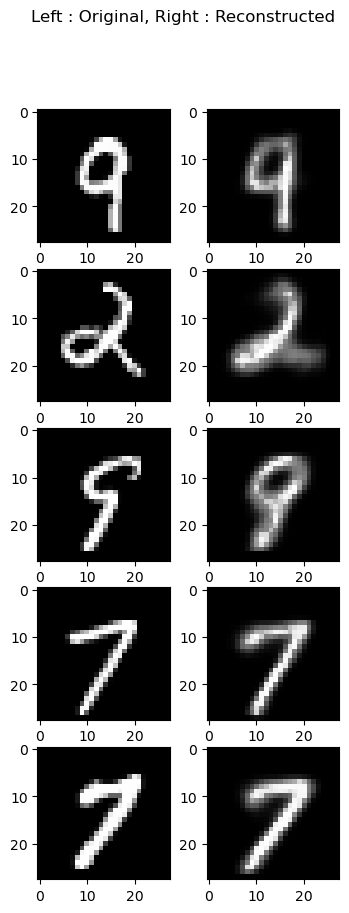

In [15]:
visualization(loader=test_loader, model=b_vae, device=DEVICE, num_of_samples=SAMPLES)

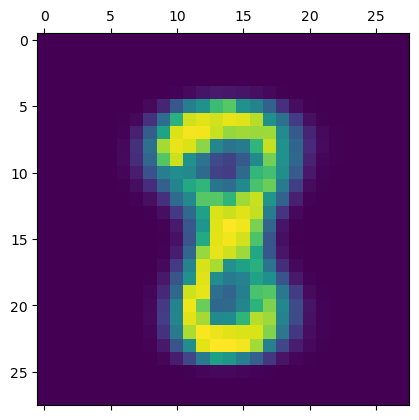

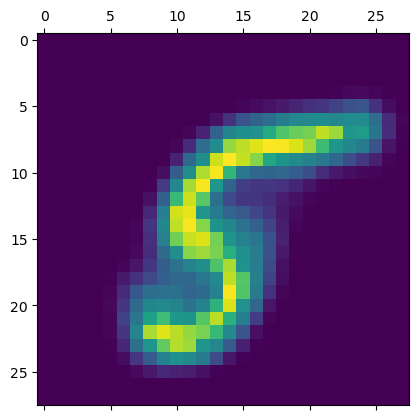

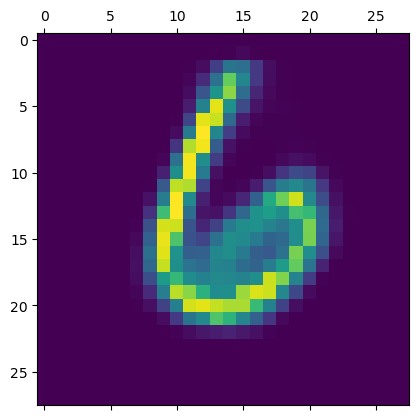

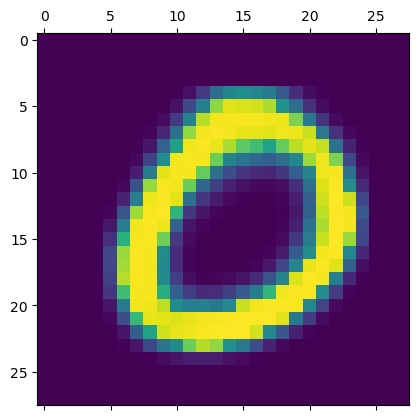

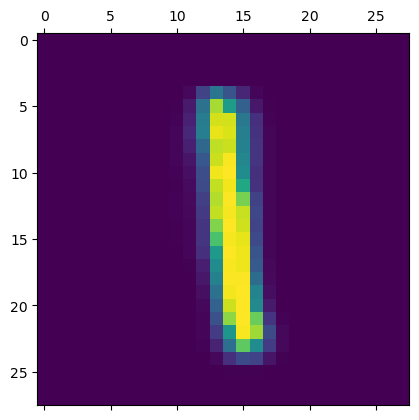

In [16]:
b_vae.cpu()
generated_samples = b_vae.generate(SAMPLES)

for sample in generated_samples:
    plt.matshow(sample.reshape(28,28))
    plt.show()

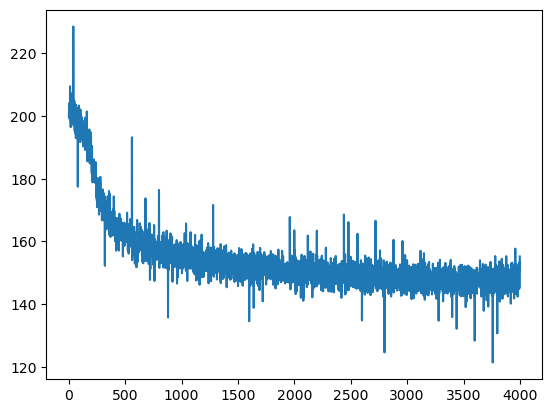

In [17]:
plt.plot(np.array(test_loss))
plt.show()